<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826041 sha256=fe8fc02c5e6c8bb585b2fe5d3f86482db4d0279b9c26c549646952e951894571
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436294 sha256=e8972bad2332f7dca48f611fd90d37089a51d11d4335cbf027307861726b4672
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [489]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-mana", interval="minute15", count=550)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                      open   high    low  close        volume         value
2023-04-12 20:00:00  787.0  787.0  782.0  782.0  4.926030e+04  3.861451e+07
2023-04-12 20:15:00  783.0  783.0  781.0  782.0  7.493274e+04  5.858591e+07
2023-04-12 20:30:00  782.0  783.0  781.0  782.0  4.187434e+04  3.272867e+07
2023-04-12 20:45:00  781.0  782.0  781.0  782.0  1.313829e+05  1.027327e+08
2023-04-12 21:00:00  782.0  783.0  778.0  779.0  2.154912e+05  1.681243e+08
...                    ...    ...    ...    ...           ...           ...
2023-04-18 12:15:00  885.0  886.0  880.0  880.0  1.473187e+06  1.299340e+09
2023-04-18 12:30:00  881.0  884.0  879.0  883.0  5.892394e+05  5.194578e+08
2023-04-18 12:45:00  883.0  883.0  877.0  878.0  1.323548e+06  1.163047e+09
2023-04-18 13:00:00  878.0  881.0  877.0  881.0  4.814993e+05  4.228969e+08
2023-04-18 13:15:00  881.0  882.0  879.0  881.0  5.400154e+05  4.754515e+08

[550 rows x 6 columns]


In [491]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-12 20:00:00,782.0
1,2023-04-12 20:15:00,782.0
2,2023-04-12 20:30:00,782.0
3,2023-04-12 20:45:00,782.0
4,2023-04-12 21:00:00,779.0
...,...,...
545,2023-04-18 12:15:00,880.0
546,2023-04-18 12:30:00,883.0
547,2023-04-18 12:45:00,878.0
548,2023-04-18 13:00:00,881.0


In [492]:
#prophet 불러옴
from fbprophet import Prophet

In [493]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [494]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


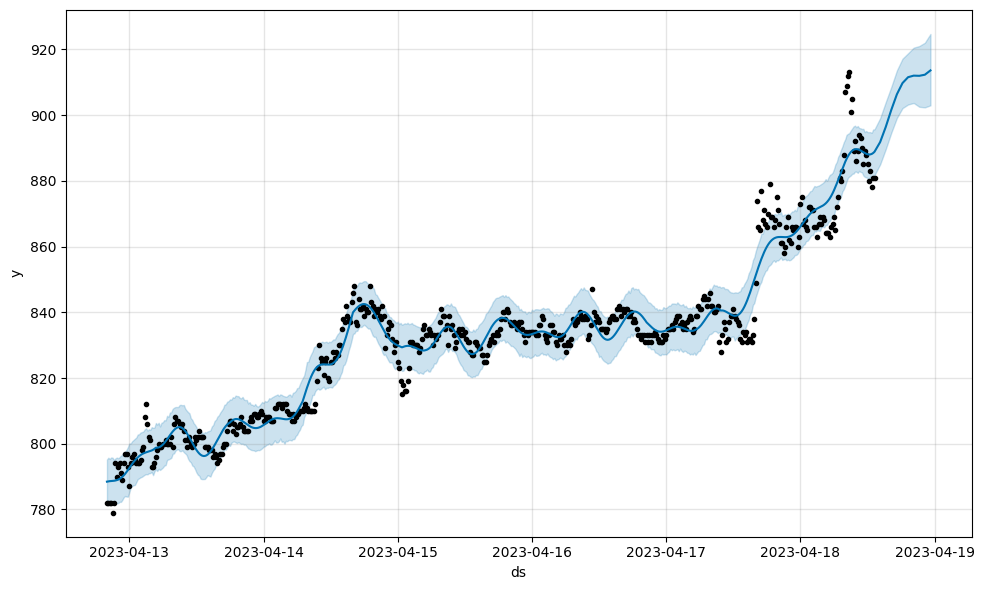

In [495]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


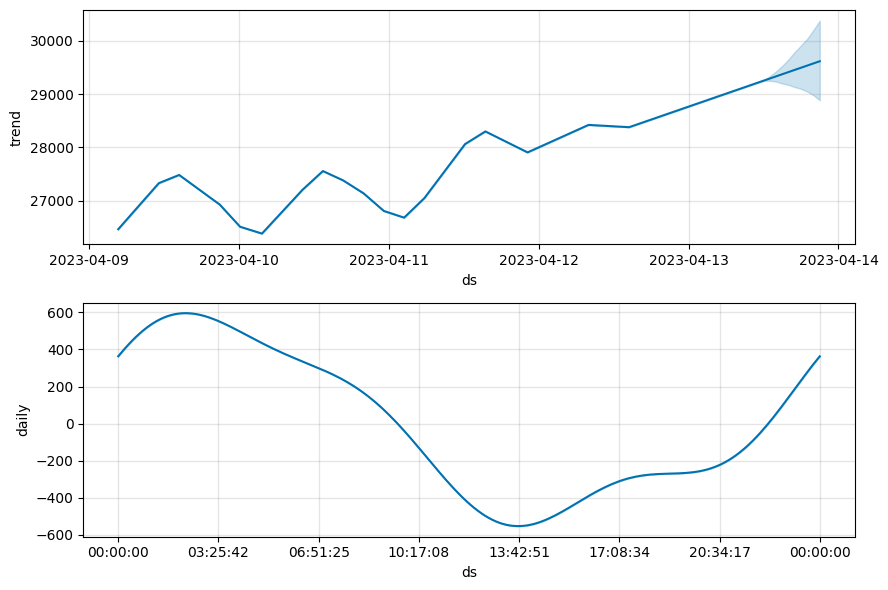

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored